In [34]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

# cab data

In [2]:
cab_data = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Cab_Data.csv')
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [11]:
cab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [ ]:
#dateoftravel excel formatında gün şeklindedir bunu date formatına çeviriz
cab_data['Date'] = pd.to_datetime(cab_data['Date'], origin='1899-12-30', unit='D')

In [25]:
cab_data

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03
...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05


In [31]:
#when we look at the travel of year 2017 has the biggest amount.
cab_data["Date"].dt.year.value_counts()

,count
Date,
2017,128510
2018,123563
2016,107319


In [37]:
cab_data['Year'] = cab_data['Date'].dt.year
cab_data['Month'] = cab_data['Date'].dt.month
cab_data['Day'] = cab_data['Date'].dt.day

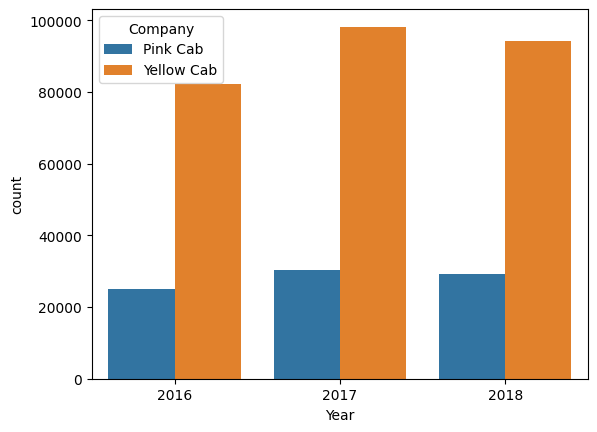

In [40]:
year = cab_data.Date.dt.year
sns.countplot(data = cab_data, x = "Year", hue="Company");


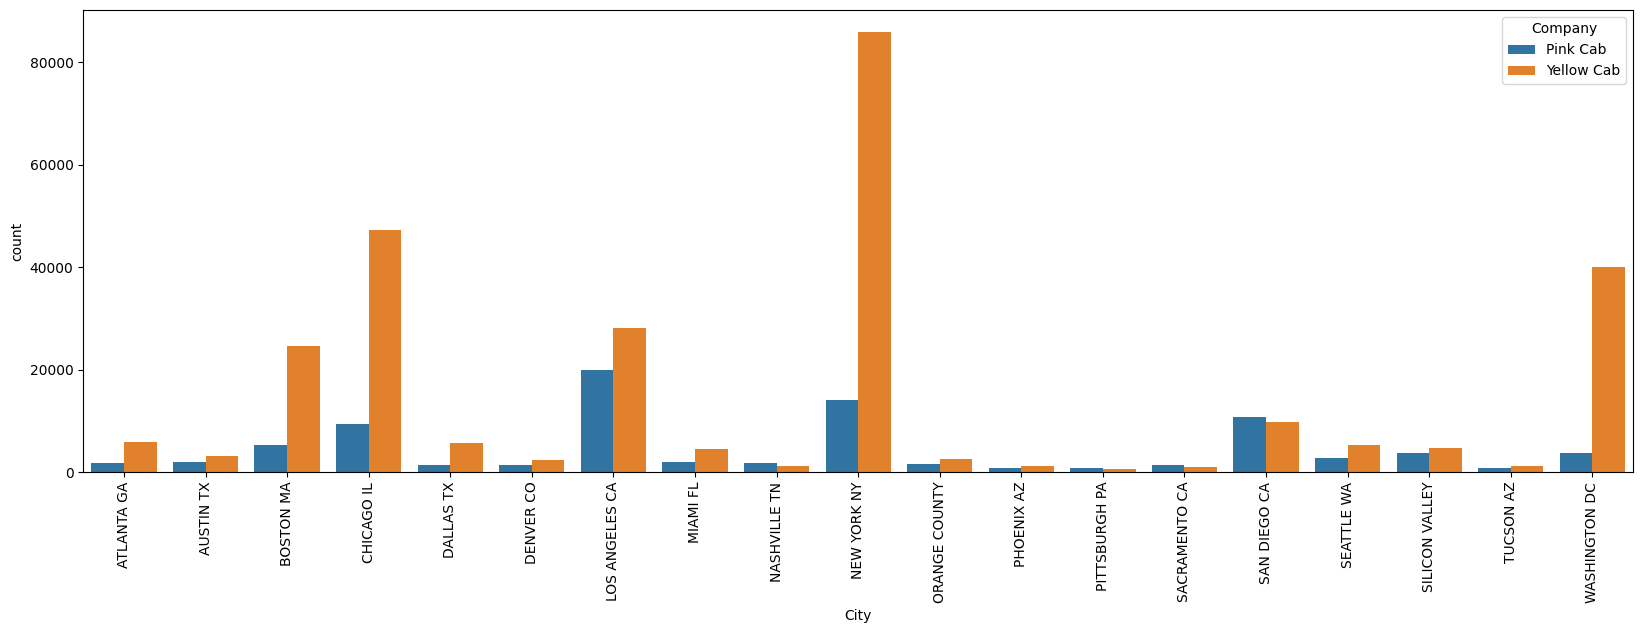

In [45]:
plt.figure(figsize=(20, 6))
year = cab_data.Date.dt.year
sns.countplot(data = cab_data, x = "City", hue="Company");
plt.xticks(rotation=90);

In [ ]:
df

# City

In [3]:
city = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/City.csv')
city

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [41]:
merged_df = pd.merge(cab_data, city, on='City')
merged_df

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Date,Year,Month,Day,Population,Users
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,2016-01-08,2016,1,8,"814,885","24,701"
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,2016-01-06,2016,1,6,"814,885","24,701"
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,2016-01-02,2016,1,2,"814,885","24,701"
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,2016-01-07,2016,1,7,"814,885","24,701"
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,2016-01-03,2016,1,3,"814,885","24,701"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,2018-01-08,2018,1,8,"418,859","127,001"
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,2018-01-04,2018,1,4,"418,859","127,001"
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,2018-01-05,2018,1,5,"418,859","127,001"
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,2018-01-05,2018,1,5,"418,859","127,001"


In [6]:
transaction = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Transaction_ID.csv')
transaction

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [ ]:
cab_data["Transaction ID"].isin()

In [ ]:
merged_df = pd.merge(merged_df, customer, on='Transaction ID')
merged_df

In [4]:
customer = pd.read_csv('/content/drive/MyDrive/TAXİ_dataset/Customer_ID.csv')
customer

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
